# Check Observed Spectrum
===========================================

- author Sylvie Dagoret-Campagne
- creation date December 2nd 2016
- update Hanuary 24th 2017

Read the fits file containing the spectrum to observe


In [1]:
import numpy as np

%config InlineBackend.rc = {}
import matplotlib
matplotlib.rc_file("templates/matplotlibrc")

import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
from astropy.io import fits


/Users/dagoret-campagnesylvie/.local/lib/python2.7/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
#fitsfiletable='fits/HD14943_m10/RT_CT_pp_us_sa_rt_HD14943_Nev39_y2016_m10_aver_spectra.fits'

In [3]:
#fitsfiletable='fits/mucol/RT_CT_pp_us_sa_rt_mucol_Nev39_y2016_m10_aver_spectra.fits'

In [4]:
fitsfiletable="fits/HD14943/2017_01_17/092_195/RT_CT_pp_us_sa_rt_HD14943_Nev92_y2016_m01_aver_spectra.fits"

In [5]:
hdulist=fits.open(fitsfiletable)
hdulist.info()

Filename: fits/HD14943/2017_01_17/092_195/RT_CT_pp_us_sa_rt_HD14943_Nev92_y2016_m01_aver_spectra.fits
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU      11   ()      
  1              BinTableHDU     18   1888R x 5C   [E, E, E, E, E]   


In [6]:
header=hdulist[0].header
print header

SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                    8 / array data type                                NAXIS   =                    0 / number of array dimensions                     EXTEND  =                    T                                                  OBJ_NAME= 'HD14943 '                                                            AIRMASS =    1.253000020980835                                                  UNITS   = 'wavelength in nm'                                                    DATE    = '2017-01-18T02:01:59.245'                                             EXPOSURE=                  0.0                                                  FILENAME= 'trim_20170117_092.fits'                                              COMMENT Prediction of observable SPECTRA                                        END                                                                                                                     

In [7]:
OBJ_NAME=header["OBJ_NAME"]

In [8]:
print OBJ_NAME

HD14943


In [9]:
table_data=hdulist[1].data

In [10]:
print table_data.columns


ColDefs(
    name = 'WAVELENGTH'; format = 'E'
    name = 'SEDcalspec'; format = 'E'
    name = 'Atmosphere'; format = 'E'
    name = 'QE'; format = 'E'
    name = 'SEDxQExATM'; format = 'E'
)


In [11]:
wavelength_sed=table_data.field('WAVELENGTH')
sed=table_data.field('SEDcalspec')
atm=table_data.field('Atmosphere')
qe=table_data.field('QE')
spectra=table_data.field('SEDxQExATM')

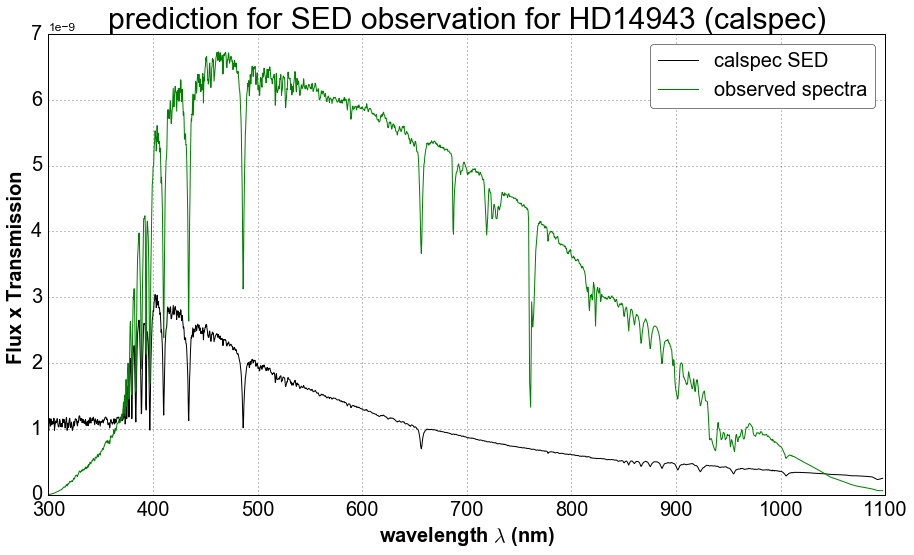

In [12]:
plt.figure(figsize=(15,8))
plt.plot(wavelength_sed,sed*100,label='calspec SED',color='k')
plt.plot(wavelength_sed,spectra,label='observed spectra',color='g')
title="prediction for SED observation for {} (calspec)".format(OBJ_NAME)
plt.title(title,fontsize=30)
plt.xlabel('wavelength $\lambda$ (nm)',fontsize=20)
plt.ylabel('Flux x Transmission ',fontsize=20)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.legend(fontsize=20)
plt.show()

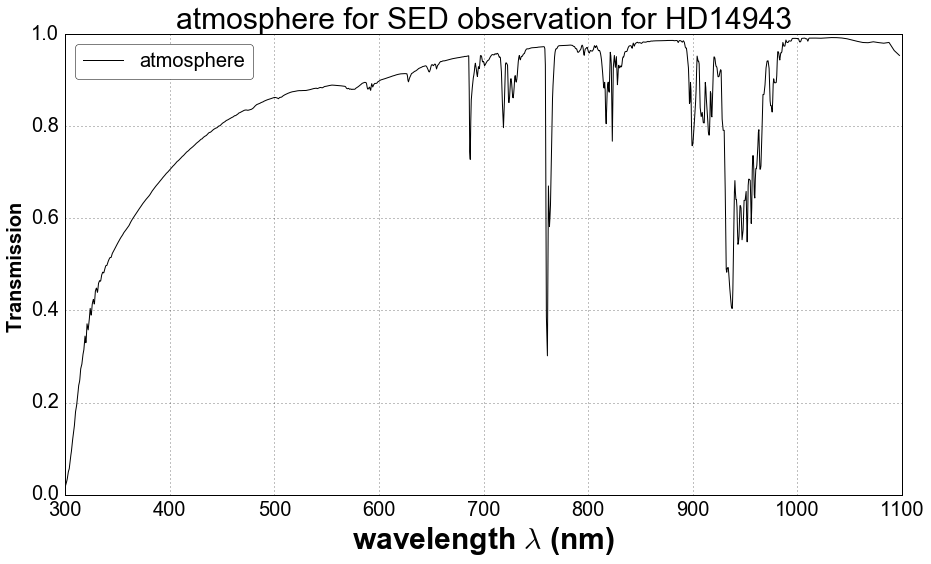

In [13]:
plt.figure(figsize=(15,8))
plt.plot(wavelength_sed,atm,label='atmosphere',color='k')
title='atmosphere for SED observation for {}'.format(OBJ_NAME)
plt.title(title,fontsize=30)
plt.xlabel('wavelength $\lambda$ (nm)',fontsize=30)
plt.ylabel('Transmission ',fontsize=20)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.legend(fontsize=20,loc=2)
plt.show()

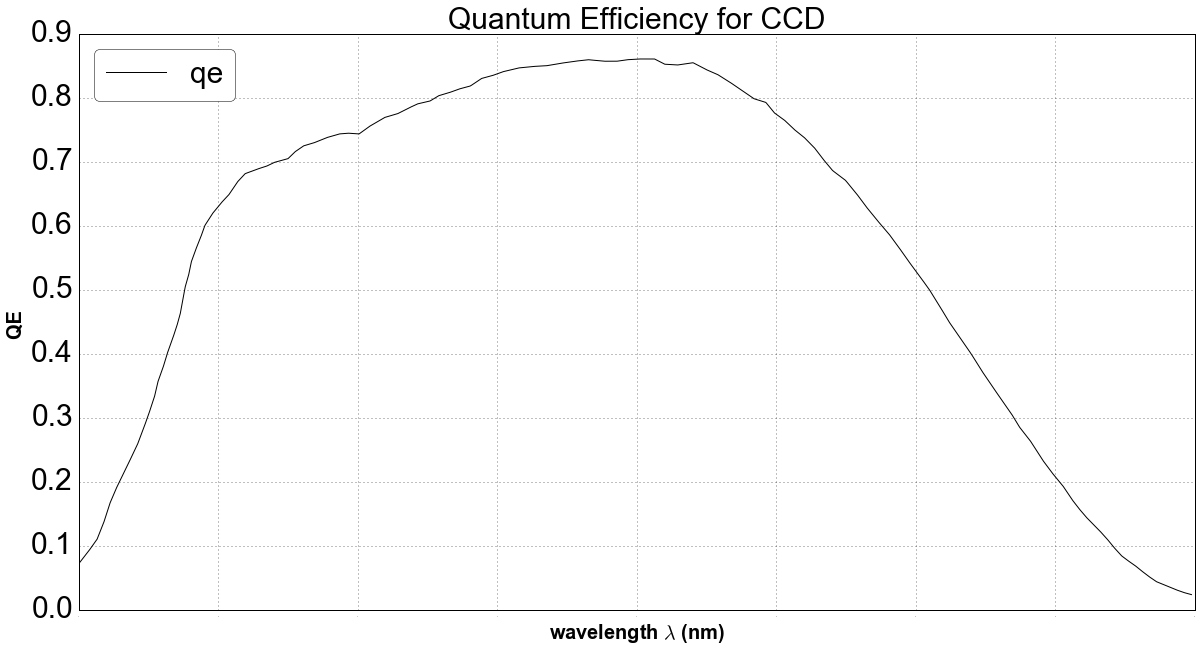

In [14]:
plt.figure(figsize=(20,10))
plt.plot(wavelength_sed,qe,label='qe',color='k')
plt.title('Quantum Efficiency for CCD',fontsize=30)
plt.xlabel('wavelength $\lambda$ (nm)',fontsize=20)
plt.ylabel('QE ',fontsize=20)
plt.tick_params(axis='x', labelsize=0)
plt.tick_params(axis='y', labelsize=30)
plt.legend(fontsize=30,loc=2)
plt.show()